In [9]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys # 키보드 키사용
from selenium.webdriver.common.by import By  
from bs4 import BeautifulSoup as bs
import urllib.request
import os
from tqdm import tqdm
import time

# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [10]:
url='https://www.opinet.co.kr/'

service = Service('C:/chromedriver.exe')
driver = webdriver.Chrome(service=service)
driver.get(url)
time.sleep(2)

driver.get('https://www.opinet.co.kr/searRgSelect.do') # 지역별 유류비 사이트 이동
time.sleep(5)

In [ ]:


sido=driver.find_element(By.ID,"SIDO_NM0") # 지역 대분류 선택, 아래와 같이 작업해도 됨
                                           # sido=driver.find_element_by_id("SIDO_NM0") # 교재 181쪽
sido.send_keys('부산')   # 대분류 부산으로 입력
time.sleep(3)

sido=driver.find_element(By.ID,"SIGUNGU_NM0") # 소분류 선택

sido.send_keys('동래구') # 소분류로 동래구 입력
time.sleep(3)


driver.find_element(By.XPATH,'//*[@id="templ_list0"]/div[7]/div/a').click() # 엑셀 저장버튼 클릭
driver.close

<bound method WebDriver.close of <selenium.webdriver.chrome.webdriver.WebDriver (session="5d7f30c45156abbf92bb04b447cc9204")>>

In [ ]:
gu_list = ['강서구', '금정구', '기장군', '동래구']

for gu in gu_list:
    sido=driver.find_element(By.ID,"SIDO_NM0") # 지역 대분류 선택, 아래와 같이 작업해도 됨
                                            # sido=driver.find_element_by_id("SIDO_NM0") # 교재 181쪽
    sido.send_keys('부산')   # 대분류 부산으로 입력
    time.sleep(3)

    sido=driver.find_element(By.ID,"SIGUNGU_NM0") # 소분류 선택

    sido.send_keys(gu) # 소분류로 동래구 입력
    time.sleep(3)

    driver.find_element(By.XPATH,'//*[@id="templ_list0"]/div[7]/div/a').click() # 엑셀 저장버튼 클릭
driver.close

# 수집한 데이터 분석해보기

In [14]:
import pandas as pd
import glob # 폴더에 있는 파일 정보 가져오기

file_lists = glob.glob('./data/*.xls')
file_lists

['./data\\지역_위치별(주유소) (1).xls',
 './data\\지역_위치별(주유소) (2).xls',
 './data\\지역_위치별(주유소) (3).xls',
 './data\\지역_위치별(주유소) (4).xls',
 './data\\지역_위치별(주유소) (5).xls',
 './data\\지역_위치별(주유소).xls']

In [24]:
df = pd.read_excel(file_lists[0], header=2)
df

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,경기도,대보건설(주) 성남(구리방향)주유소,경기 성남시 수정구 산성대로 41,알뜰(ex),031-759-0178,Y,-,1607,1485,-
1,경기도,㈜세진주유소 남문지점,경기 성남시 수정구 성남대로 1301 (태평동),HD현대오일뱅크,031-751-0941,Y,1885,1645,1514,-
2,경기도,㈜세진주유소 경원지점,경기 성남시 수정구 성남대로 1414 (복정동),HD현대오일뱅크,031-751-6051,Y,1885,1645,1514,-
3,경기도,주식회사 세진주유소,경기 성남시 수정구 성남대로 1529,HD현대오일뱅크,031-757-0551,Y,1885,1645,1514,1499
4,경기도,지에스칼텍스㈜직영 성남제일주유소,경기 성남시 수정구 성남대로 1268,GS칼텍스,031-753-2217,N,1874,1647,1514,1350
5,경기도,산성주유소,경기 성남시 수정구 산성대로 607 (양지동),GS칼텍스,031-747-5766,Y,-,1650,1525,-
6,경기도,(유)동하석유 송파IC주유소,경기 성남시 수정구 헌릉로 893,SK에너지,031-752-0893,Y,1875,1670,1565,-
7,경기도,MOT플러스,경기 성남시 수정구 산성대로 463 (단대동),S-OIL,031-735-2942,N,-,1675,1555,-
8,경기도,e-푸른주유소,경기 성남시 수정구 성남대로 1482 (복정동),S-OIL,031-759-5189,N,-,1677,1588,-
9,경기도,(주)새서울석유 동판교주유소,경기 성남시 수정구 대왕판교로 1002 (고등동),HD현대오일뱅크,031-723-6331,Y,1867,1696,1547,1500


In [29]:

# 파일 통합
df_oil = pd.DataFrame() # 전체 데이터를 저장할 변수 생성
for file in file_lists:
    df = pd.read_excel(file, header=2)
    df_oil = pd.concat([df_oil, df], ignore_index=True) # raw index를 재설정하라는 의미
df_oil.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      301 non-null    object
 1   상호      301 non-null    object
 2   주소      301 non-null    object
 3   상표      301 non-null    object
 4   전화번호    301 non-null    object
 5   셀프여부    301 non-null    object
 6   고급휘발유   301 non-null    object
 7   휘발유     301 non-null    int64 
 8   경유      301 non-null    int64 
 9   실내등유    301 non-null    object
dtypes: int64(2), object(8)
memory usage: 23.6+ KB


In [35]:
df_oil.head(3)
# df_oil_temp = df_oil.__deepcopy__()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,경기도,대보건설(주) 성남(구리방향)주유소,경기 성남시 수정구 산성대로 41,알뜰(ex),031-759-0178,Y,-,1607,1485,-
1,경기도,㈜세진주유소 남문지점,경기 성남시 수정구 성남대로 1301 (태평동),HD현대오일뱅크,031-751-0941,Y,1885,1645,1514,-
2,경기도,㈜세진주유소 경원지점,경기 성남시 수정구 성남대로 1414 (복정동),HD현대오일뱅크,031-751-6051,Y,1885,1645,1514,-


In [ ]:
df_oil_tmp = df_oil
df_tmp=df_oil[['상호', '주소', '상표', '셀프여부', '휘발유', '경유']]
print(df_tmp.head(3))
print(df_tmp.tail(3))

                    상호                          주소        상표 셀프여부   휘발유    경유
0  대보건설(주) 성남(구리방향)주유소          경기 성남시 수정구 산성대로 41    알뜰(ex)    Y  1607  1485
1          ㈜세진주유소 남문지점  경기 성남시 수정구 성남대로 1301 (태평동)  HD현대오일뱅크    Y  1645  1514
2          ㈜세진주유소 경원지점  경기 성남시 수정구 성남대로 1414 (복정동)  HD현대오일뱅크    Y  1645  1514
                   상호                      주소        상표 셀프여부   휘발유    경유
298  KH에너지㈜직영 분당공원주유소      경기 성남시 분당구 새마을로 27     SK에너지    N  1848  1717
299             서현주유소      경기 성남시 분당구 새마을로 19     GS칼텍스    N  1848  1717
300   (주)새서울석유 신도시주유소  경기 성남시 분당구 황새울로359번길 3  HD현대오일뱅크    N  1998  1798


In [41]:
df_tmp.head(3)

,상호,주소,상표,셀프여부,휘발유,경유
0,대보건설(주) 성남(구리방향)주유소,경기 성남시 수정구 산성대로 41,알뜰(ex),Y,1607,1485
1,㈜세진주유소 남문지점,경기 성남시 수정구 성남대로 1301 (태평동),HD현대오일뱅크,Y,1645,1514
2,㈜세진주유소 경원지점,경기 성남시 수정구 성남대로 1414 (복정동),HD현대오일뱅크,Y,1645,1514


In [42]:
df_tmp.tail(3)

,상호,주소,상표,셀프여부,휘발유,경유
298,KH에너지㈜직영 분당공원주유소,경기 성남시 분당구 새마을로 27,SK에너지,N,1848,1717
299,서현주유소,경기 성남시 분당구 새마을로 19,GS칼텍스,N,1848,1717
300,(주)새서울석유 신도시주유소,경기 성남시 분당구 황새울로359번길 3,HD현대오일뱅크,N,1998,1798


In [44]:
txt = '경기 성남시 수정구 성남대로 1301 (태평동)'
txt.split(" ")
df_tmp['지역'] = [add.split(" ")[1] for add in df_tmp['주소']]
df_tmp.head(3)


,상호,주소,상표,셀프여부,휘발유,경유,지역
0,대보건설(주) 성남(구리방향)주유소,경기 성남시 수정구 산성대로 41,알뜰(ex),Y,1607,1485,성남시
1,㈜세진주유소 남문지점,경기 성남시 수정구 성남대로 1301 (태평동),HD현대오일뱅크,Y,1645,1514,성남시
2,㈜세진주유소 경원지점,경기 성남시 수정구 성남대로 1414 (복정동),HD현대오일뱅크,Y,1645,1514,성남시


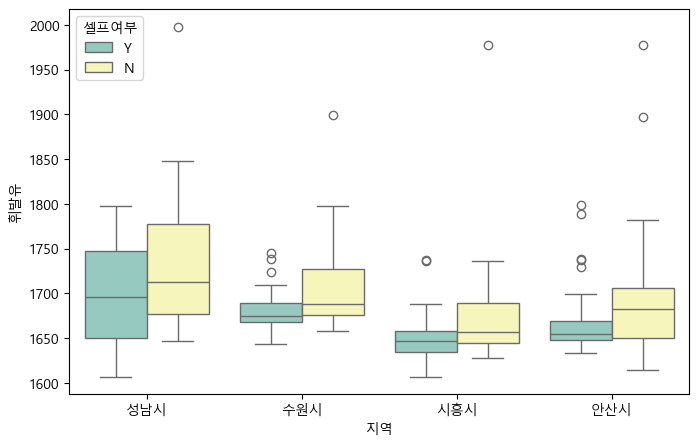

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
  rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
  path = "c:/Windows/Fonts/malgun.ttf"
  font_name = font_manager.FontProperties(fname=path).get_name()
  rc('font', family=font_name)
elif platform.system() == 'Linux':
  plt.rc('font', family='NanumBarunGothic')
else:
  print('Unkown system..')

# 박스플롯
plt.figure(figsize=(8,5))

sns.boxplot(x='지역', y='휘발유', hue='셀프여부', data=df_tmp, palette='Set3')
plt.show()

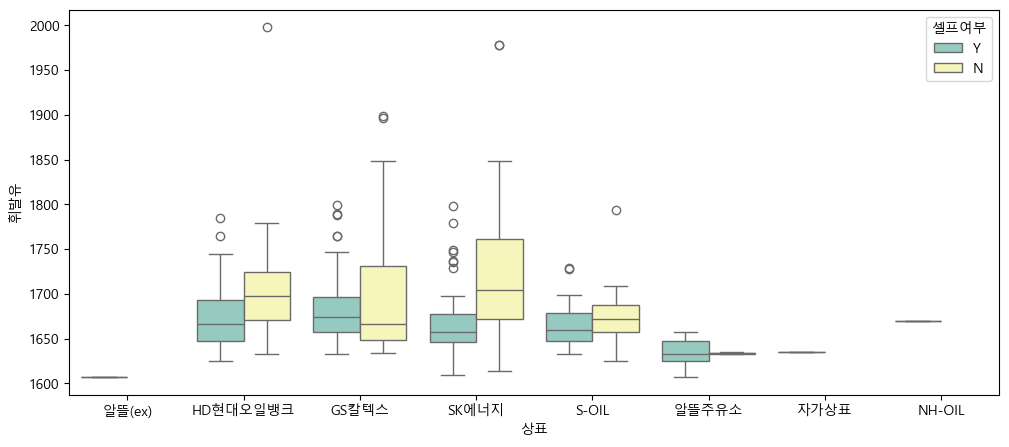

In [57]:

# 박스플롯
plt.figure(figsize=(12,5))

sns.boxplot(x='상표', y='휘발유', hue='셀프여부', data=df_tmp, palette='Set3')
plt.show()